# Front Matter  
### CASA0013: Introduction to Programming for Spatial Analysis (20/21)  
### Student ID: 20021978  
### Title: Airbnb Marketing and Investment Strategies during the Covid19 Pandemic in London  
### Word count for the Executive Briefing: 1383

# Executive Summary  
This report provides a comprehensive analysis of Airbnb performance in London, using datasets obtained from the [Inside Airbnb website](http://insideairbnb.com/get-the-data.html) compiled on 16 December 2020. Based on python technology, we analyze some impacts of the Covid19 pandemic on short term rental platforms such as Airbnb and made recommendations on how to operate during the epidemic.  
## Key Findings
As the analysis suggest, people renting a room during the Covid19 epidemic are more concerned with the type and the location of properties, as it is about their ability to keep social distancing from others and prevent being infected. Therefore, entire apartments in central London are more popular, followed by private rooms in an apartment located in the suburbs.  
## Recommendations
Based on the findings, there are three promotional suggestions for hosts and investors in London to attract consumers during the pandemic:  
1. Residents who own a spare entire flat in central London can register as an Airbnb host to rent out their apartment, while landlords owning multiple properties may consider mainly renting out entire apartment and only renting out shared rooms in areas where the Covid19 is not severe.     
2. Hosts can modify their room descriptions to highlight features such as clean rooms and neighbourhood, friendly community, etc.   
3. All rooms for rent should be disinfected and the safety of the tenants need to be guaranteed.  

# Reproducible Analysis


In [ ]:
%matplotlib inline

import requests
import pandas as pd
import geopandas as gpd
import csv
import matplotlib.pyplot as plt

In [2]:
# Get listings from Inside Airbnb website, and read it

url = "http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/data/listings.csv.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

In [3]:
lst = pd.read_csv('listings.csv.gz')
lst.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201216161425,2021-01-04,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2,2,0,0,1.46
1,13913,https://www.airbnb.com/rooms/13913,20201216161425,2020-12-18,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201216161425,2020-12-28,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.66
3,17402,https://www.airbnb.com/rooms/17402,20201216161425,2020-12-19,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,f,15,15,0,0,0.35
4,17506,https://www.airbnb.com/rooms/17506,20201216161425,2020-12-18,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [5]:
# Get reviews from Inside Airbnb website, and read it

url2 = "http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/data/reviews.csv.gz"
filename2 = url2.split("/")[-1]
with open(filename2, "wb") as f:
    r = requests.get(url2)
    f.write(r.content)

rev = pd.read_csv('reviews.csv.gz')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and..."
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...
3,11551,48926,2010-06-01,122714,John & Sylvia,We had a most wonderful stay with Adriano and ...
4,11551,58352,2010-06-28,111543,Monique,I'm not sure which of us misunderstood the s...


In [6]:
# Select the records since 2020.01.01 and group them by date, and then count them.

reviews_try = rev[(pd.to_datetime(rev['date'] ,format = '%Y-%m-%d')>= pd.to_datetime('2020-01-01',format = '%Y-%m-%d'))]

date = reviews_try.groupby("date")

date.describe().head()

listing_id                                                    \
                count          mean           std      min          25%   
date                                                                      
2020-01-01     2134.0  2.661018e+07  1.206613e+07  51830.0  18118453.75   
2020-01-02     2097.0  2.490389e+07  1.248109e+07  43129.0  15440491.00   
2020-01-03     1565.0  2.510392e+07  1.251134e+07  41311.0  15880168.00   
2020-01-04     1242.0  2.535215e+07  1.229998e+07  25123.0  16650784.00   
2020-01-05     1277.0  2.511623e+07  1.213617e+07  64429.0  16310033.00   

                                                     id                ...  \
                   50%          75%         max   count          mean  ...   
date                                                                   ...   
2020-01-01  29302069.0  37576582.75  41188278.0  2134.0  5.859268e+08  ...   
2020-01-02  26679207.0  36538522.00  41169388.0  2097.0  5.868519e+08  ...   
2020-01-03  26592382.0  37072143.00  41194103.0  1565.0  5.876291e+08  ...   
2020-01-04  27432941.5  36580582.75  41167458.0  1242.0  5.882686e+08  ...   
2020-01-05  26988710.0  36214080.00  41189652.0  1277.0  5.889525e+08  ...   

                                      reviewer_id                              \
                     75%          max       count          mean           std   
date                                                                            
2020-01-01  5.860225e+08  586260043.0      2134.0  1.517007e+08  1.042017e+08   
2020-01-02  5.869515e+08  587298695.0      2097.0  1.499000e+08  1.047740e+08   
2020-01-03  5.876950e+08  587935125.0      1565.0  1.405051e+08  1.043253e+08   
2020-01-04  5.883273e+08  588639406.0      1242.0  1.350965e+08  1.029438e+08   
2020-01-05  5.890213e+08  589353715.0      1277.0  1.381017e+08  1.063781e+08   

                                                                           
                 min          25%          50%           75%          max  
date                                                                       
2020-01-01  357303.0  54430022.25  135202327.5  2.512276e+08  323026960.0  
2020-01-02  110013.0  52164429.00  134379361.0  2.516649e+08  323266088.0  
2020-01-03   25111.0  45508928.00  119393300.0  2.313214e+08  324049149.0  
2020-01-04    4879.0  43383496.50  111182109.5  2.262198e+08  324192552.0  
2020-01-05   81747.0  37151616.00  115522054.0  2.310985e+08  324177831.0  

[5 rows x 24 columns]

In [7]:
date.size()

date
2020-01-01    2134
2020-01-02    2097
2020-01-03    1565
2020-01-04    1242
2020-01-05    1277
              ... 
2020-12-30       8
2020-12-31      10
2021-01-01       8
2021-01-02       3
2021-01-04       2
Length: 369, dtype: int64

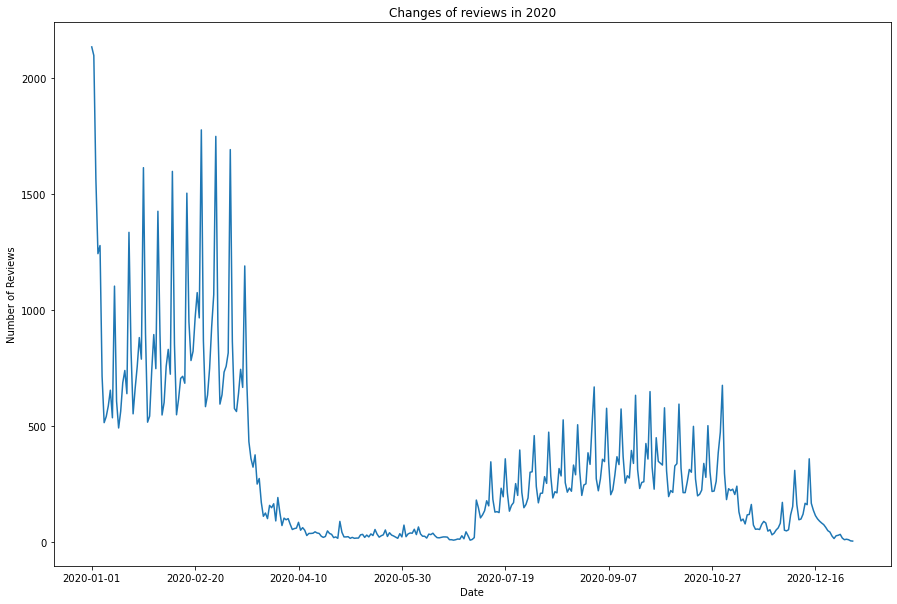

In [8]:
# Consider the count of reviews per day as the number of booked rooms and generate the changes in a time series.

changes = plt.figure(figsize=(15,10))
date.size().plot.line()
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.title("Changes of reviews in 2020")

import os
os.getcwd()

changes.savefig("market_change.png", dpi=600)

In [9]:
# The period between 2020.03.01 and 2020.12.01 as the pandemic period.

rev_selected = rev[(pd.to_datetime(rev['date'] ,format = '%Y-%m-%d')>= pd.to_datetime('2020-03-01',format = '%Y-%m-%d')) 
                   & (pd.to_datetime(rev['date'] ,format = '%Y-%m-%d') <= pd.to_datetime('2020-12-01',format = '%Y-%m-%d'))]

rev_selected.to_csv('review2003-2012.csv', columns=['comments'], index = False)

In [10]:
# The period between 2019.03.01 and 2019.12.01 as the non-pandemic period.

rev = pd.read_csv('reviews.csv.gz')
rev_selected2 = rev[(pd.to_datetime(rev['date'] ,format = '%Y-%m-%d')>= pd.to_datetime('2019-03-01',format = '%Y-%m-%d')) 
                   & (pd.to_datetime(rev['date'] ,format = '%Y-%m-%d') <= pd.to_datetime('2019-12-01',format = '%Y-%m-%d'))]

rev_selected2.to_csv('review1903-1912.csv', columns=['comments'], index = False)

In [3]:
rev1 = pd.read_csv("review2003-2012.csv")
rev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59157 entries, 0 to 59156
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  59087 non-null  object
dtypes: object(1)
memory usage: 462.3+ KB


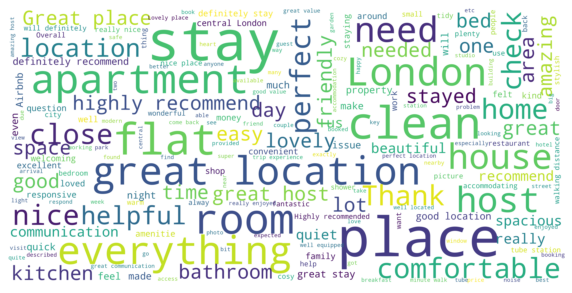

In [4]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

my_rev = []
with open('review2003-2012.csv', 'rt') as f:
    reader = csv.reader(f)
    my_rev = '\t'.join([i[0] for i in reader])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, 
                      scale=12,
                      background_color='white', 
                      max_words=250, 
                      max_font_size=40).generate(my_rev)

# Display the generated image:
# the matplotlib way:

fig = plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("covid_review.png", dpi=600)

In [13]:
# Clean the listings and delete objects whose "last_review" is NA.
# Regard the date of last review as the date of last booked.

lst = pd.read_csv('listings.csv.gz')
lst_dropna = lst.dropna(axis=0,subset = ['last_review'])
lst_dropna['last_review'].head()

0    2020-03-26
1    2020-02-22
2    2020-03-16
3    2019-11-02
5    2020-03-15
Name: last_review, dtype: object

In [14]:
lst_selected = lst_dropna[(pd.to_datetime(lst_dropna['last_review'] ,format = '%Y-%m-%d')>= pd.to_datetime('2020-03-01',format = '%Y-%m-%d')) 
                   & (pd.to_datetime(lst_dropna['last_review'] ,format = '%Y-%m-%d') <= pd.to_datetime('2020-12-01',format = '%Y-%m-%d'))]

lst_selected.to_csv('nearly_booked.csv', na_rep='NA', index=False)

In [15]:
lst_selected2 = lst_dropna[(pd.to_datetime(lst_dropna['last_review'] ,format = '%Y-%m-%d')>= pd.to_datetime('2019-03-01',format = '%Y-%m-%d')) 
                   & (pd.to_datetime(lst_dropna['last_review'] ,format = '%Y-%m-%d') <= pd.to_datetime('2019-12-01',format = '%Y-%m-%d'))]

lst_selected2.to_csv('former_booked.csv', na_rep='NA', index=False)

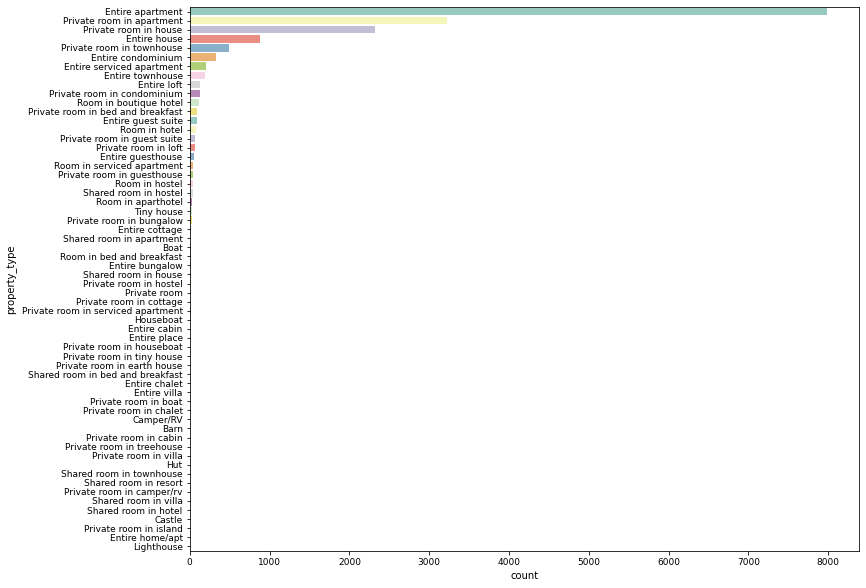

In [29]:
import seaborn as sns

nearly_booked = pd.read_csv('nearly_booked.csv')
former_booked = pd.read_csv('former_booked.csv')

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax = sns.countplot(y='property_type', palette = "Set3", data = nearly_booked, 
                  order = nearly_booked['property_type'].value_counts().index)
ax.tick_params(labelsize = 9)
fig.savefig("nearly_booked_property.png", dpi=600, bbox_inches='tight')

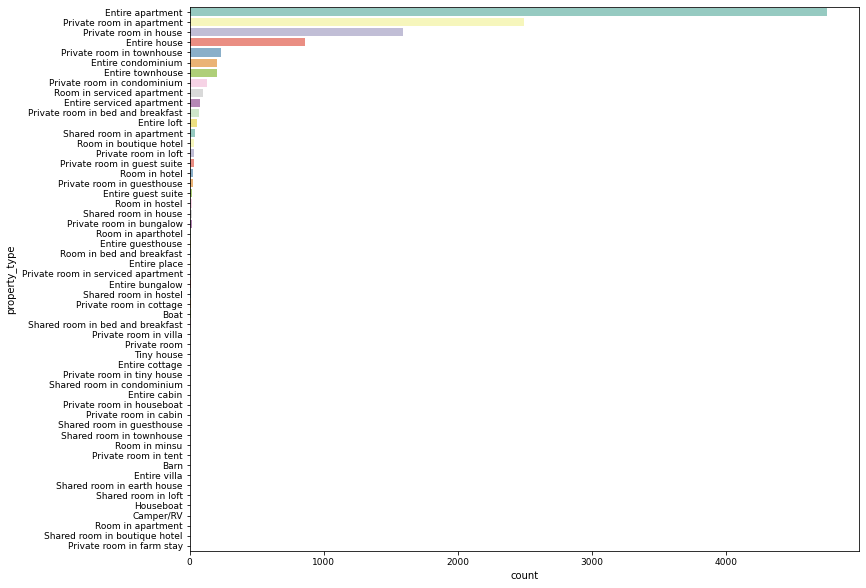

In [30]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax = sns.countplot(y='property_type', palette = "Set3", data = former_booked, 
                  order = former_booked['property_type'].value_counts().index)
ax.tick_params(labelsize = 9)
fig.savefig("former_booked_property.png", dpi=600, bbox_inches='tight')

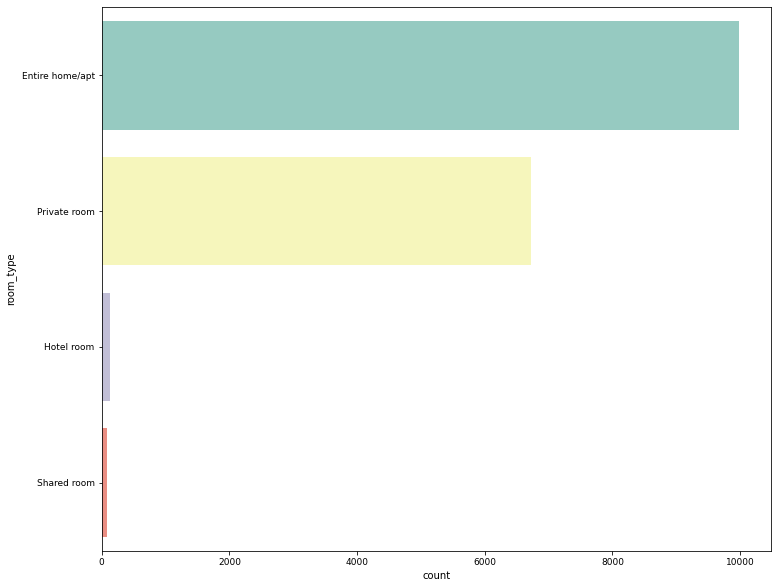

In [18]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax = sns.countplot(y='room_type', palette = "Set3", data = nearly_booked, 
                   order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
ax.tick_params(labelsize = 9)

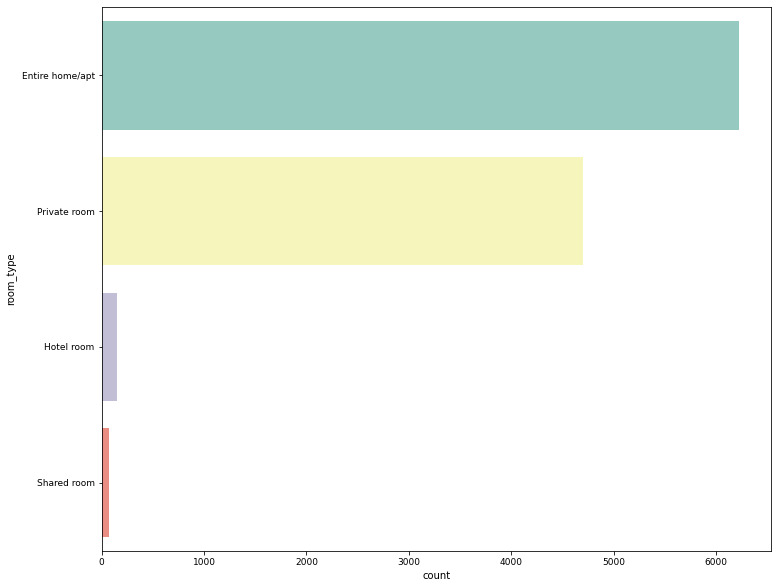

In [19]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax = sns.countplot(y='room_type', palette = "Set3", data = former_booked, 
                  order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'])
ax.tick_params(labelsize = 9)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

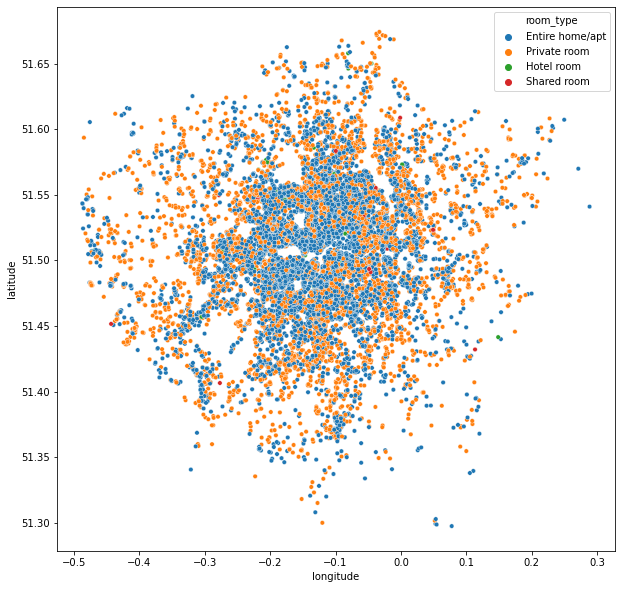

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='room_type',s=20, data=nearly_booked)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

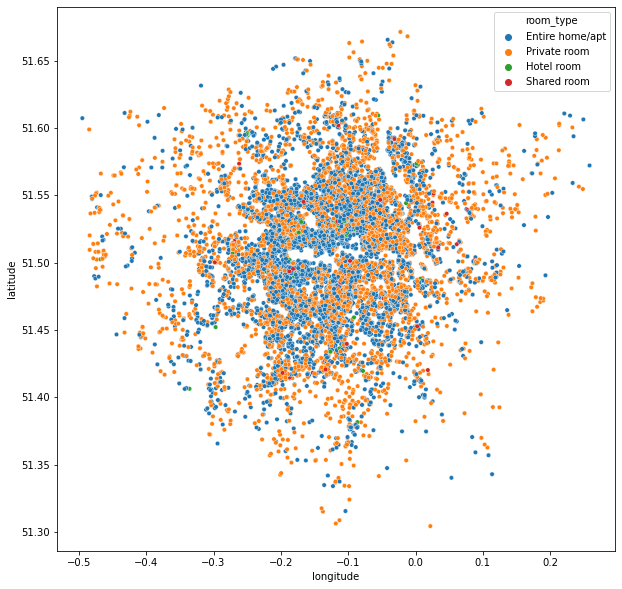

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='room_type',
                hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], s=20, data=former_booked)

In [22]:
# Get London map from Inside Airbnb website, and plot it

url = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-12-16/visualisations/neighbourhoods.geojson'
r = requests.get(url)
with open('neighbourhoods.geojson', 'wb') as fo:
    fo.write(r.content)

<AxesSubplot:>

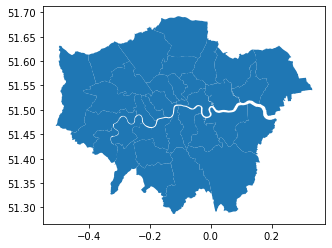

In [23]:
import geopandas as gpd
london = gpd.read_file('neighbourhoods.geojson')
london.plot()

<Figure size 1080x720 with 0 Axes>

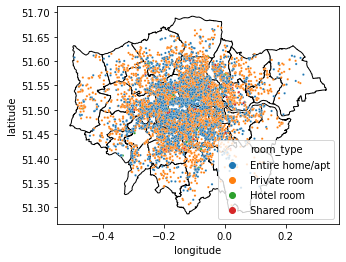

In [24]:
# Integrate the scatter plot with the London map

plt.figure(figsize=(15,10))

fig, ax = plt.subplots()
ax.set_aspect('equal')
london.plot(ax=ax, color='white', edgecolor='black')

sns.scatterplot(ax=ax, x='longitude', y='latitude', hue='room_type',
                hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
                s=5, data=former_booked)
plt.show()
fig.savefig("former_distribution.png", dpi=300)

<Figure size 1080x720 with 0 Axes>

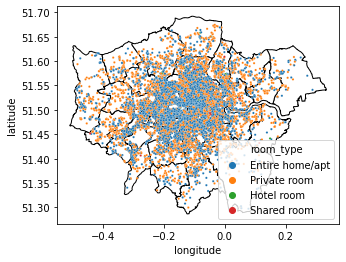

In [25]:
plt.figure(figsize=(15,10))

fig, ax = plt.subplots()
ax.set_aspect('equal')
london.plot(ax=ax, color='white', edgecolor='black')

sns.scatterplot(ax=ax, x='longitude', y='latitude', hue='room_type',
                hue_order=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
                s=5, data=nearly_booked)
plt.show()
fig.savefig("nearly_distribution.png", dpi=300)

# Executive Briefing

## The Development and Challenges of Airbnb  
As Hellwig and his colleagues (2015) conclude, sharing is the most basic economic behaviour that has existed for thousands of years. In particular, with the development of the Internet, the sharing practices have become more accessible through online technologies, and various open-source software, shared programs, online collaboration platforms as well as peer-to-peer financing tools and document sharing websites have facilitated the realization of the online sharing economy (Hamari, Sjöklint, and Ukkonen 2016).   
And the demand for sharing and exchanging physical products and services through web-brokered platforms is growing because of global integration and the increased pursuit of people's spiritual world, which has led to the growth of domestic and international travel businesses. International tourism continues to rank among the fastest-growing sectors of the global economy by 2020, and according to World Tourism Organization (2019), the number of international visitors grew by 5% to 1.4 billion in 2018, which the figure is two years ahead of the UNWTO's forecast. In terms of travelling accommodation, many people are looking forward to experiencing the authentic culture and living like a local during the trip (Zervas, Proserpio, and Byers 2014). Besides, as trust between strangers rises, people are more willing to share rooms, to entertain visitors, and to share what life is really like in this region with them (Yannopoulou, Moufahim, and Bian 2013). Therefore, online short-term rental mediators, such as Airbnb, provide a convenient, informative, and interactive rental platform allowing hosts to list and guests to discover distinctive accommodations around the world (Trivett and Staff 2013; Guttentag 2015).  
Compared to traditional hotels, Airbnb attracts customers by unique attributes of the community environment, warm and welcoming atmosphere, pets, flexibility, price competitiveness, accessibility for disabled people, and the possibility of living with strangers (Kiatkawsin et al. 2020; Zhang et al. 2020).   
However, the development of Airbnb has not proceeded without challenges. In the early days, many cities did not have policies related to short-term rentals and the rental market was thrown into disarray by the entry of individual lettings. From 2015, many European cities including Berlin, London, and Paris, have introduced a series of policies and regulations (Nieuwland and van Melik 2020) to reduce adverse effects on traditional accommodation providers such as hotels and some affected residents (Falk and Yang 2020).  
Apart from that, because of the widespread of coronavirus and the lockdown policies across the world, people have cancelled their travel plans. As the World Tourism Organization (UNWTO) reported, “the COVID-19 pandemic has caused a 22% fall in international tourist arrivals during the first quarter of 2020”, and they forecasted the number of tourists projected to fall 60-80% in 2020 (UNWTO 2020). The demand for short-term rentals in tourist destinations has consequently decreased significantly, with many hosts facing cancellations and reduced bookings, and as a result, many are considering quitting the rental platforms.

## Airbnb in London During the Pandemic  
From January 2020 onwards, when confirmed cases of Covid19 began to appear, international travel to certain areas is restricted, and the Foreign and Commonwealth Office of UK government advised citizens not to go to the epicentre of the outbreak except for essential trips on 23 January (Foreign, Commonwealth & Development Office 2020). Then on 16 March, the Prime Minister of the United Kingdom Boris Johnson said people should work from home and “everyone should avoid office, pubs and travelling” (BBC News 2020), which was the day considered to be the first day of the lockdown of London.   
The Airbnb in London had also issued several policies in response to the lockdown. For example, if travellers have to cancel their reservation made on or before 14 March 2020 due to the Covid19 pandemic, they can get a full refund by submitting official documents or, depending on the host's policy, ask for a larger refund. And in context of quarantine and isolation, guests who have been tested positive for Covid19 or are suspected of being infected are not allowed to stay in Airbnb rooms and those from high-risk areas or whose family members are diagnosed are not supported to rent a room for self-isolation (Airbnb UK 2020).   
The epidemic has brought numerous changes and challenges to the rental market, and hosts and investors are constantly adjusting their marketing strategies and business models to adapt to the market in the context of the Covid19 pandemic and to genuinely reach as many customers as possible.

## Report Objectives  
The short-time rental market in 2020 will be significantly different from previous years. In order to give investors a new perspective on the promotion, we have downloaded relative London datasets from Inside Airbnb websites and analysed the performance of Airbnb in London during the pandemic in 2020, compared to the same period in 2019, to find out how consumers’ preferences have changed.   
For this purpose, we will discuss the following two questions in detail and give recommendations according to the outcomes.   
1. When is the turning point of the Airbnb market in London caused by Covid19? 
2. What are people more concerned about after the outbreak of Covid19?

## When is the turning point of the Airbnb market in London caused by Covid19?  
Based on the data collected, we use the total counts of reviews per day generating from “reviews.csv” to give some indication of the overall number of booking records. Figure 1 illustrates that Airbnb reservations dropped sharply around March in 2020, with a minor bounce after June. We have therefore taken March as the start of the epidemic in London and defined the period from March to December in 2020 as the Covid19 affected period. Correspondingly, for the non-epidemic period (normal days), we choose March to December in 2019.  
![Figure 1. The number of reviews in 2020](https://raw.githubusercontent.com/CindyHu1023/CASA0013_I2P_final/main/covid_review.png)  

## What are people more concerned about after the outbreak of Covid19?
In the travel market domain, reviews are generally considered to be important (Statistic Brain 2017). New types of reviews including real photos, videos, social posts, and even Q&A interactions (Akehurst 2009, cited in Luo 2018:5) on online platforms are increasingly used as the basis for people's choices. Filieri’s (2016) research also argues that consumers’ reviews are more informative and credible than the company’s information. Thus, we assessed the keywords of the reviews left by consumers during the epidemic to determine what they mostly cared about, and based on this, we can do further analysis.  
![Figure 2. The word cloud of reviews after March, 2020](https://raw.githubusercontent.com/CindyHu1023/CASA0013_I2P_final/main/market_change.png) 

After obtaining the word-cloud of reviews during the pandemic (Figure 2), we can see that the most frequently mentioned word is “place”, “location”, “apartment”, “flat”, “house”, “clean”, etc., which means we can investigate the preferences of tenants mainly from property types, room types, location, etc.  
![Figure 3. The distribution and changes of property types of London in 2019 and 2020](https://raw.githubusercontent.com/CindyHu1023/CASA0013_I2P_final/main/property_types.png)    

In terms of the type of properties (Figure 3), the reservation of entire apartments remained highest, while the proportion of the usage of private rooms in apartments and entire house decreased during the pandemic, which tends to indicate that people would like to live alone and avoid contacts with others.  
![Figure 4. The spatial distribution of room types of London in 2019 and 2020](https://raw.githubusercontent.com/CindyHu1023/CASA0013_I2P_final/main/room_types.png)   

And as to the room types customers prefer (Figure 4), significantly fewer private rooms were rented out in 2020 compared to 2019 and they were centrally located in the suburbs of London, where the situation of the epidemic is not such severe. While, more people changed their mind to live in self-contained flats in central London.  

## Recommendations for Airbnb host and investors during the pandemic  
Due to the Covid19 pandemic, people's travel plans were cancelled, which greatly affected the short-term rental markets, especially in tourist attraction cities. Based on the findings mentioned above, we offer three promotional suggestions for London investors to attract customers under this situation.  
1. Residents who own a spare entire flat in central London can register as an Airbnb host to rent out their apartment, while landlords owning multiple properties may consider mainly renting out entire apartment and only renting out shared rooms in areas where the Covid19 is not severe. 
2. Hosts can modify their room descriptions to highlight features such as clean rooms and neighbourhood, friendly community, etc. 
3. All rooms for rent should be disinfected and the safety of the tenants need to be guaranteed.

## References  
Airbnb. 2020. Policies. Available at: https://www.airbnb.co.uk/help/topic/1583/policies  
BBC News. 2020. Coronavirus: PM says everyone should avoid office, pubs and travelling. Available at: https://www.bbc.com/news/uk-51917562
Falk, M.T., & Yang, Y. 2020. Hotels benefit from stricter regulations on short-term rentals in European cities. Tourism Economics: 135481662091876.  
Filieri, R. 2016. What makes an online consumer review trustworthy? Annals of Tourism Research, 58, 46-64.  
Foreign, Commonwealth & Development Office. 2020. Available at: https://www.gov.uk/government/organisations/foreign-commonwealth-development-office  
Guttentag, D. 2015. Airbnb: Disruptive innovation and the rise of an informal tourism accommodation sector. Curr. Issues Tour. 2015,18, 1192–1217.  
Hamari, J., Sjöklint, M., & Ukkonen, A. 2016. The sharing economy: Why people participate in collaborative consumption. Journal of the Association for Information Science and Technology, 67 (9), 2047-2059.  
Hellwig, K., Morhart, F., Girardin, F., & Hauser, M. 2015. Exploring different types of sharing: A proposed segmentation of the market for “sharing” businesses. Psychology & Marketing, 32 (9), 891-906.  
Kiatkawsin, K., Sutherland, I., & Kim, J.-Y. 2020. A Comparative Automated Text Analysis of Airbnb Reviews in Hong Kong and Singapore Using Latent Dirichlet Allocation. Sustainability 12(16): 6673.  
Luo Yi. 2018. What Airbnb Reviews can Tell us? An Advanced Latent Aspect Rating Analysis Approach. Graduate Theses and Dissertations. 16403.  
Nieuwland S and Van Melik R. 2020. Regulating Airbnb: how cities deal with perceived negative externalities of short-term rentals. Current Issues in Tourism23(7): 811–825.  
Statistic Brain. 2017. Internet Travel & Hotel Booking Statistics. Retrieved from https://www.statisticbrain.com/internet-travel-hotel-booking-statistics/  
Trivett, V., & Staff, S. 2013. What the sharing economy means to the future of travel. New York, NY: Skift.  
World Tourism Organization. 2019. International Tourism Highlights, 2019 Edition, UNWTO, Madrid, DOI: https://doi.org/10.18111/9789284421152  
World Tourism Organization. 2020. International Tourist Numbers Could Fall 60-80% in 2020, UNWTO Reports, UNWTO. Available at: https://www.unwto.org/news/covid-19-international-tourist-numbers-could-fall-60-80-in-2020  
Yannopoulou, N., Moufahim, M., & Bian, X. 2013. User-generated brands and social media: Couchsurfing and AirBnb. Contemporary Management Research, 9(1), 85-90.  
Zervas, G., Proserpio, D., & Byers, J. W. 2014. The rise of the sharing economy: Estimating the impact of Airbnb on the hotel industry. Boston U. School of Management Research Paper (2014). Retrieved March 4, 2018, from http://people.bu.edu/zg/publications/airbnb.pdf  
Zhang, G.; Cui, R.; Cheng, M.; Zhang, Q.; Li, Z. 2020. A comparison of key attributes between peer-to-peer accommodations and hotels using online reviews. Curr. Issues Tour. 2020,23, 530–537.  
